In [3]:
import numpy as np
import qutip as qt
import scipy as sp
import scipy.linalg as spla
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from tqdm import tqdm
import os
from joblib import Parallel, delayed
import warnings
from scipy.sparse import SparseEfficiencyWarning
import pickle
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")

import sBs
import bits
import metrology
import importlib
import plotsmodule
importlib.reload(plotsmodule)
importlib.reload(sBs)
importlib.reload(bits)
importlib.reload(metrology)
from sBs import *
from bits import *
from metrology import *
from plotsmodule import *

In [4]:
path = os.getcwd()
path_noiseless = os.path.dirname(path)
path_data = path_noiseless + '/Data/'
path_data_results = path_data + '/Results/'
path_data_states = path_data + '/Finite-energy state/'
path_figures = path_noiseless + '/Figures/'

# Preparing finite-energy states starting in the vacuum

In [ ]:
# Delta_range = np.arange(0.25,0.41,.01)
# Delta_range = [.3]
# R_range = [120]
# gauges = [0,0]
# for R in R_range:
#     for Delta in tqdm(Delta_range):
#         rhos, probs_gq, probs_gp = sBs_cycle(Delta,R,rho_vacuum,gauges)
#         rho = rhos[-1]
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}_test'.format(Delta,R)
#         sps.save_npz(path_data_states + name + '.npz', rho)

100%|██████████| 1/1 [00:05<00:00,  5.18s/it]


In [ ]:
# Delta, R = 0.3, 120
# name = 'sensor_Delta={0:.2f}_R={1:.0f}_test.npz'.format(Delta,R)
# sensor = sps.load_npz(path_data_states+name)
# Tq, Tp = stabilizers(Delta)

# print('stabilizers',(Tq@sensor).diagonal().sum(),(Tp@sensor).diagonal().sum())
# photons = (n_op@sensor).diagonal().sum()
# print('photons',np.real(photons), (1-Delta**2)/2/Delta**2)

# gamma = (0.4+0.2j)/np.sqrt(2)
# U_gamma = Displacement(gamma)
# sensor_gamma = U_gamma@sensor@U_gamma.getH()

# fock = sps.csc_matrix(qt.fock(N,3))
# E_q_fock = (q_op @ fock).diagonal().sum()
# E_p_fock = (p_op @ fock).diagonal().sum()
# qp_fock = (q_op @ p_op @ fock).diagonal().sum()
# pq_fock = (p_op @ q_op @ fock).diagonal().sum()
# print('covariance fock', (qp_fock+pq_fock)/2-E_q_fock*E_p_fock)


# E_q = (q_op @ sensor).diagonal().sum()
# E_p = (p_op @ sensor).diagonal().sum()
# qp = (q_op @ p_op @ sensor).diagonal().sum()
# pq = (p_op @ q_op @ sensor).diagonal().sum()
# qp_gamma = (q_op @ p_op @ sensor_gamma).diagonal().sum()
# pq_gamma = (p_op @ q_op @ sensor_gamma).diagonal().sum()
# Var_q = (q_op @ q_op @ sensor).diagonal().sum()
# Var_p = (p_op @ p_op @ sensor).diagonal().sum()
# print('qp',qp)
# print('pq',pq)
# print('Var_q',Var_q)
# print('Var_p',Var_p)
# print('Var_q + Var_p',Var_q + Var_p, '2n+1',2*photons+1)
# print('qp_gamma',qp_gamma)
# print('pq_gamma',pq_gamma)
# print('Covariance GKP', (qp+pq)/2-E_q*E_p)

# sensor = qt.Qobj(sensor)
# print(sensor.tr())
# xvec = np.arange(-2*l,2*l,0.05)
# W = qt.wigner(sensor, xvec, xvec)

stabilizers (1.0080302030282844+2.278720589545612e-17j) (1.0080469166326356+4.850089090868405e-17j)
photons 5.273124881225138 5.055555555555556
covariance fock 0j
qp (-2.665913649049171e-16+0.5000002337814126j)
pq (-2.6659136490491693e-16-0.5000002337814128j)
Var_q (5.773358818953755+6.862682721795497e-31j)
Var_p (5.77289141105934+8.267501914531003e-31j)
Var_q + Var_p (11.546250230013094+1.51301846363265e-30j) 2n+1 (11.546249762450277+1.3587296377725172e-30j)
qp_gamma (0.08000003740377966+0.5000002337807742j)
pq_gamma (0.0800000374037796-0.5000002337807743j)
Covariance GKP (-2.6659136490491703e-16-1.1102230246251565e-16j)
1.0000004675638123


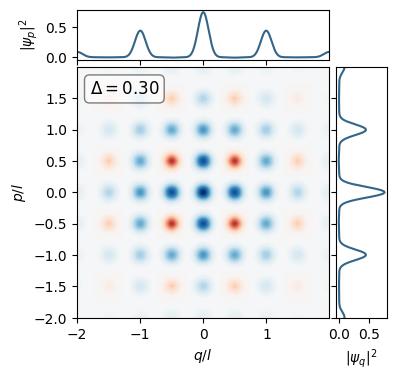

In [8]:
# # Assuming W, xvec, and l are already defined
# row_marginal = np.sum(W, axis=0)*(xvec[1]-xvec[0])
# column_marginal = np.sum(W, axis=1)*(xvec[1]-xvec[0])
# # row_squeezed_marginal = np.sum(W_squeezed, axis=0)*(xvec[1]-xvec[0])
# # column_squezeed_marginal = np.sum(W_squeezed, axis=1)*(xvec[1]-xvec[0])

# max_row = np.max(row_marginal).copy()
# # max_squeezed = np.max(row_squeezed_marginal)
# # row_squeezed_marginal = row_squeezed_marginal*(max_row/max_squeezed)# Normalize the color scale
# nrm = mpl.colors.Normalize(-W.max(), W.max())

# # Create the main plot and the marginal plots
# fig = plt.figure(figsize=(4, 4))
# gs = fig.add_gridspec(2, 2, width_ratios=(5, 1), height_ratios=(1, 5), hspace=0.05, wspace=0.05)

# # Main contour plot
# ax_main = fig.add_subplot(gs[1, 0])
# contour = ax_main.contourf(xvec/l, xvec/l, W, 100, cmap=cm.RdBu, norm=nrm)
# ax_main.set_xlabel(r'$q/l$')
# ax_main.set_ylabel(r'$p/l$')

# # Row marginal plot
# ax_row = fig.add_subplot(gs[0, 0], sharex=ax_main)
# ax_row.plot(xvec/l, row_marginal, color=blue)
# # ax_row.plot(xvec/l, row_squeezed_marginal, color=green)
# ax_row.set_ylabel(r'$|\psi_p|^2$')
# ax_row.xaxis.set_tick_params(labelbottom=False)

# # Column marginal plot
# ax_col = fig.add_subplot(gs[1, 1], sharey=ax_main)
# ax_col.plot(column_marginal, xvec/l, color=blue)
# ax_col.set_xlabel(r'$|\psi_q|^2$')
# ax_col.yaxis.set_tick_params(labelleft=False)

# # Add textbox with the value of Delta
# textstr = r'$\Delta = {0:.2f}$'.format(Delta)
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax_main.text(0.05, 0.95, textstr, transform=ax_main.transAxes, fontsize=12,
#              verticalalignment='top', bbox=props)

# plt.show()

# Averaged map simulations

### probabilties, stabilizer and photons of averaged map

In [ ]:
def getting_probs_stabs_photons(Delta,R0,R1):
    probs_q0p0 = []
    stabilizers_q0p0 = []
    photons_q0p0 = []
    name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
    sensor = sps.csc_matrix(sps.load_npz(path_data_states+name))
    for q0 in q0_range:
        cd = np.cosh(Delta**2)
        Tq_delta, Tp_delta = stabilizers(Delta)
        def get_probs_stabilizers_photons_q0p0(q0,p0):
            alpha = (q0+1j*p0)/np.sqrt(2)
            Dalpha = Displacement(alpha)
            rho = Dalpha@sensor@Dalpha.getH()
            rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho)
            Tq_delta_alpha, Tp_delta_alpha = displaced_stabilizers(Tq_delta,Tp_delta,q0)
            stabilizers_q, stabilizers_p = [], []
            photons = []
            for rho in rhos:
                q_0, p_0 = (q_op@rho).diagonal().sum(), (p_op@rho).diagonal().sum()
                alpha = (q_0 + 1j*p_0)/np.sqrt(2)
                Tq_delta_alpha, Tp_delta_alpha = displaced_stabilizers(Tq_delta,Tp_delta,alpha)
                stabilizers_q.append((Tq_delta_alpha@rho).diagonal().sum())
                stabilizers_p.append((Tp_delta_alpha@rho).diagonal().sum())
                photons.append((n_op@rho).diagonal().sum())
            return [probs_gq,probs_gp,stabilizers_q,stabilizers_p,photons]
        probs_stabilizers_photons = Parallel(n_jobs=20)(delayed(get_probs_stabilizers_photons_q0p0)(q0,p0) for p0 in p0_range)
        probs_stabilizers_photons = np.array(probs_stabilizers_photons)
        probs_array = probs_stabilizers_photons[:,:2]
        stabilizers_array = probs_stabilizers_photons[:,2:]
        photons_array = probs_stabilizers_photons[:,4]
        probs_q0p0.append(probs_array)
        stabilizers_q0p0.append(stabilizers_array)
        photons_q0p0.append(photons_array)
    probs_array = np.array(probs_q0p0)#shape [q0][p0][q or p][round]
    stabilizers_array = np.array(stabilizers_q0p0)
    photons_array = np.array(photons_q0p0)
    name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}'.format(Delta,R1,len(q0_range))
    print(name_probs)
    name_stabs = 'stabilizers_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}'.format(Delta,R1,len(q0_range))
    name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}'.format(Delta,R1,len(q0_range))
    np.save(path_data_results + name_probs,probs_array)
    np.save(path_data_results + name_stabs,stabilizers_array)
    np.save(path_data_results + name_photons,photons_array)

R0, R1 = 120, 30 #preparation, rounds
steps = [25]
for step in steps:
    q0_range = (l/2)*np.linspace(0,1.0,step)
    # p0_range = (l/step)*np.arange(0,step+1,1)
    p0_range = (l/8)*np.arange(0,9,1)
    Delta_range = [0.25,0.3,0.35]

    for Delta in tqdm(Delta_range):
        getting_probs_stabs_photons(Delta,R0,R1)
print('Done!')

### probabilities for metrological potential

In [ ]:
print(np.linspace(-1.0,1.0,201))

[-1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91 -0.9  -0.89
 -0.88 -0.87 -0.86 -0.85 -0.84 -0.83 -0.82 -0.81 -0.8  -0.79 -0.78 -0.77
 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69 -0.68 -0.67 -0.66 -0.65
 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55 -0.54 -0.53
 -0.52 -0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29
 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17
 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05
 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07
  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0

In [ ]:
def getting_probs(Delta,R0,R1,k,steps,gauges):
    cd = np.cosh(Delta**2)
    q0_range = (l/4/cd)*np.linspace(-1.0,1.0,steps)
    if k==0:
        p0 = 0
    else:
        p0 = l/k
    probs_q0p0 = []
    print(Delta)
    name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
    sensor = sps.csc_matrix(sps.load_npz(path_data_states+name))
    def get_probs_q0p0(q0,p0):
        alpha = (q0+1j*p0)/np.sqrt(2)
        Dalpha = Displacement(alpha)
        rho = Dalpha@sensor@Dalpha.getH()
        rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho,gauges)
        return [probs_gq,probs_gp]
    
    probs = Parallel(n_jobs=20)(delayed(get_probs_q0p0)(q0,p0) for q0 in q0_range)
    probs_array = np.array(probs)#shape [q0][q or p][round]
    name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}_p0=lover{2:.0f}_q0range(-lover4,lover4)_steps={3:.0f}'.format(Delta,R1,k,steps)
    print(name_probs)
    np.save(path_data_results + name_probs,probs_array)
    return None


R0, R1 = 120, 15 #preparation, rounds
steps = 101
gauges = [0,0]
p0_range = [0]
Delta_range = [.25]
for k in p0_range:
    for Delta in tqdm(Delta_range):
        getting_probs(Delta,R0,R1,k,steps,gauges)
print('Done!')

  0%|          | 0/1 [00:00<?, ?it/s]

0.25


/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603

[[0.01246484 0.01719797 0.02594457 0.03833568 0.05389421 0.07207317
  0.09229413 0.11398203 0.13659347 0.15963721 0.18268705 0.20538754
  0.22745429 0.24866999 0.26887794]
 [0.49999917 0.49999917 0.49999917 0.49999917 0.49999917 0.49999917
  0.49999916 0.49999915 0.49999915 0.49999914 0.49999913 0.49999912
  0.49999912 0.49999911 0.4999991 ]]
probabilities_Delta=0.25_R=15_p0=lover0_q0range(-lover4,lover4)_steps=101
Done!


In [ ]:
# def getting_probs(Delta,R0,R1,k,steps,gauges):
#     cd = np.cosh(Delta**2)
#     p0_range = (l/4/cd)*np.linspace(-1.0,1.0,steps)
#     if k==0:
#         q0 = 0
#     else:
#         q0 = l/k
#     probs_q0p0 = []
#     print(Delta)
#     name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#     sensor = sps.csc_matrix(sps.load_npz(path_data_states+name))
#     def get_probs_q0p0(q0,p0):
#         alpha = (q0+1j*p0)/np.sqrt(2)
#         Dalpha = Displacement(alpha)
#         rho = Dalpha@sensor@Dalpha.getH()
#         rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho,gauges)
#         return [probs_gq,probs_gp]
    
#     probs = Parallel(n_jobs=20)(delayed(get_probs_q0p0)(q0,p0) for p0 in p0_range)
#     probs_array = np.array(probs)#shape [q0][q or p][round]
#     name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0=lover{2:.0f}_p0range(-lover4,lover4)_steps={3:.0f}'.format(Delta,R1,k,steps)
#     print(name_probs)
#     np.save(path_data_results + name_probs,probs_array)
#     return None

# R0, R1 = 120, 15 #preparation, rounds
# steps = 101
# gauges = [0,0]
# q0_range = [0,2,4]
# Delta_range = [.25,0.3,.35]
# for k in p0_range:
#     for Delta in tqdm(Delta_range):
#         getting_probs(Delta,R0,R1,k,steps,gauges)
# print('Done!')

# Full map simulations

In [ ]:
# # getting the probabilities up to T=7, but for a single p0
# R0, T = 120, 4 #preparation, rounds
# steps = 101
# gauges = [0,0]
# p0_range = [0,2,4]
# Delta_range = [0.25,.3,.35]
# q0_range = (l/4)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
# for k in p0_range:
#     if k==0:
#         p0 = 0
#     else:
#         p0 = l/k
#     for Delta in Delta_range:
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#         sensor = sps.load_npz(path_data_states+name)
#         probs_allbits_p0q = []
#         for q0 in tqdm(q0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_p0q.append(probs_b)
#         probs_allbits_p0q = np.array(probs_allbits_p0q)
#         name = 'probs_allbits_p0=lover{0:.0f}_qrange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
#         np.save(path_data_results+name,probs_allbits_p0q)

100%|██████████| 101/101 [02:53<00:00,  1.72s/it]


In [ ]:
# np.linspace(-1.5,1.5,101)

In [ ]:
# # getting the probabilities up to T=7, but for a single p0
# R0, T = 120, 4 #preparation, rounds
# steps = 101
# p0_range = [0,2,4]
# Delta_range = [0.25,.3,.35]
# q0_range = (3*l/2)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
# for k in p0_range:
#     if k==0:
#         p0 = 0
#     else:
#         p0 = l/k
#     for Delta in Delta_range:
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#         sensor = sps.load_npz(path_data_states+name)
#         probs_allbits_p0q = []
#         for q0 in tqdm(q0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_p0q.append(probs_b)
#         probs_allbits_p0q = np.array(probs_allbits_p0q)
#         name = 'probs_allbits_p0=lover{0:.2f}_qrange(-3lover2,3lover2)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
#         np.save(path_data_results+name,probs_allbits_p0q)

  0%|          | 0/101 [00:00<?, ?it/s]


TypeError: sBs_allbits() missing 1 required positional argument: 'gauges'

In [ ]:
# getting the probabilities up to T=4, but for a single p0, range -l to l for gaussian priors
R0, T = 120, 4 #preparation, rounds
steps = 51
gauges = [0,0]
# p0_range = [0,2,4]
q0_range = [0]
Delta_range = [0.25,.3,.35]
# q0_range = (l)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
p0_range = (l)*np.linspace(-1.0,1.0,steps)
for k in q0_range:
    if k==0:
        q0 = 0
    else:
        q0 = l/k
    for Delta in Delta_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_states+name)
        probs_allbits_p0q = []
        for p0 in tqdm(p0_range):
            probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
            probs_allbits_p0q.append(probs_b)
        probs_allbits_p0q = np.array(probs_allbits_p0q)
        # name = 'probs_allbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        name = 'probs_allbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        np.save(path_data_results+name,probs_allbits_p0q)

100%|██████████| 51/51 [01:25<00:00,  1.68s/it]


In [ ]:
Delta_range = [0.25,.3,.35]
k, T = 0, 4
steps = 101
for Delta in Delta_range:
    name = 'probs_allbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
    probs_allbits_p0q = np.load(path_data_results+name+'.npy')


# Running full q-p bits

In [ ]:
# getting the probabilities up to T=7, but for a single p0
R0, T = 120, 2 #preparation, rounds
steps = 101
gauges = [0,0]
Delta = 0.45
q0, p0 = -l/4, 0
name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
sensor = sps.load_npz(path_data_states+name)
probs_qbits = sBs_allqbits(Delta,q0,p0,sensor,T,gauges)
print(probs_qbits)


[0.01820958 0.02535166 0.07095309 0.88548556]


### q bits

In [ ]:
# getting the probabilities up to T=7, but for a single p0, l/4
R0, T = 120, 10 #preparation, rounds
steps = 201
gauges = [0,0]
p0_range = [0]
Delta_range = np.arange(0.25,0.41,.01)
Delta_range = [0.3]
q0_range = (l)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
for k in p0_range:
    if k==0:
        p0 = 0
    else:
        p0 = l/k
    for Delta in Delta_range:
        print(Delta)
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_states+name)
        # probs_qbits_p0q = Parallel(n_jobs=20)(delayed(sBs_allqbits)(Delta,q0,p0,sensor,T,gauges) for q0 in tqdm(q0_range))
        probs_qbits_p0q = []
        for q0 in tqdm(q0_range):
            probs_b = sBs_allqbits(Delta,q0,p0,sensor,T,gauges)
            probs_qbits_p0q.append(probs_b)
        probs_qbits_p0q = np.array(probs_qbits_p0q)
        # name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division

        print(name)
        np.save(path_data_results+name,probs_qbits_p0q)

0.3


  0%|          | 0/201 [00:00<?, ?it/s]

100%|██████████| 201/201 [57:07<00:00, 17.05s/it]

probs_allqbits_p0=lover0_qrange(-l,l)_steps=201_Delta=0.30_T=10


In [ ]:
Delta = 0.4
name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}.npy'.format(k,steps,Delta,T)#D\equiv /, division
np.load(path_data_results+name)

array([[1.59345169e-03, 2.12293456e-04, 1.14068751e-04, ...,
        4.54214995e-02, 5.47123782e-02, 1.09254448e-01],
       [1.17195585e-03, 1.52534766e-04, 8.14783976e-05, ...,
        4.26139273e-02, 5.09748965e-02, 9.93506350e-02],
       [8.51807213e-04, 1.08748861e-04, 5.79369139e-05, ...,
        3.97045375e-02, 4.71654861e-02, 8.97076006e-02],
       ...,
       [8.97076006e-02, 4.71654861e-02, 3.97045375e-02, ...,
        5.79369139e-05, 1.08748861e-04, 8.51807213e-04],
       [9.93506350e-02, 5.09748965e-02, 4.26139273e-02, ...,
        8.14783976e-05, 1.52534766e-04, 1.17195585e-03],
       [1.09254448e-01, 5.47123782e-02, 4.54214995e-02, ...,
        1.14068751e-04, 2.12293456e-04, 1.59345169e-03]])

### p bits

In [ ]:
# getting the probabilities up to T=10, but for a single q0,l
R0, T = 120, 10 #preparation, rounds
steps = 51
gauges = [0,0]
q0_range = [0]
Delta_range = [.25,.3,.35,.4]
p0_range = (l)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
for k in q0_range:
    if k==0:
        q0 = 0
    else:
        q0 = l/k
    for Delta in Delta_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_states+name)
        # probs_qbits_p0q = Parallel(n_jobs=20)(delayed(sBs_allqbits)(Delta,q0,p0,sensor,T,gauges) for q0 in tqdm(q0_range))
        probs_qbits_p0q = []
        for p0 in tqdm(p0_range):
            probs_b = sBs_allpbits(Delta,q0,p0,sensor,T,gauges)
            probs_qbits_p0q.append(probs_b)
        probs_qbits_p0q = np.array(probs_qbits_p0q)
        name = 'probs_allpbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        print(name)
        np.save(path_data_results+name,probs_qbits_p0q)

100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.25_T=10


100%|██████████| 51/51 [17:03<00:00, 20.08s/it]


probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.30_T=10


100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.35_T=10


100%|██████████| 51/51 [17:03<00:00, 20.07s/it]

probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.40_T=10


In [ ]:
# getting the probabilities up to T=10, but for a single q0,l
R0, T = 120, 10 #preparation, rounds
steps = 51
gauges = [0,0]
q0_range = [0]
Delta_range = np.arange(0.25,0.41,.01)
p0_range = (l/4)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
for k in q0_range:
    if k==0:
        q0 = 0
    else:
        q0 = l/k
    for Delta in Delta_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_states+name)
        # probs_qbits_p0q = Parallel(n_jobs=20)(delayed(sBs_allqbits)(Delta,q0,p0,sensor,T,gauges) for q0 in tqdm(q0_range))
        probs_qbits_p0q = []
        for p0 in tqdm(p0_range):
            probs_b = sBs_allpbits(Delta,q0,p0,sensor,T,gauges)
            probs_qbits_p0q.append(probs_b)
        probs_qbits_p0q = np.array(probs_qbits_p0q)
        name = 'probs_allpbits_q0=lover{0:.0f}_prange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        print(name)
        np.save(path_data_results+name,probs_qbits_p0q)

100%|██████████| 51/51 [17:06<00:00, 20.12s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.25_T=10


100%|██████████| 51/51 [17:03<00:00, 20.07s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.26_T=10


100%|██████████| 51/51 [17:00<00:00, 20.01s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.27_T=10


100%|██████████| 51/51 [17:02<00:00, 20.05s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.28_T=10


100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.29_T=10


100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.30_T=10


100%|██████████| 51/51 [17:01<00:00, 20.03s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.31_T=10


100%|██████████| 51/51 [17:03<00:00, 20.07s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.32_T=10


100%|██████████| 51/51 [17:02<00:00, 20.05s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.33_T=10


100%|██████████| 51/51 [16:59<00:00, 19.99s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.34_T=10


100%|██████████| 51/51 [17:07<00:00, 20.15s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.35_T=10


 98%|█████████▊| 50/51 [16:42<00:19, 19.95s/it]

In [ ]:
k, T = 0, 10
steps = 51
Delta_range = np.arange(0.25,0.41,.01)
for Delta in Delta_range:
    name = 'probs_allpbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}.npy'.format(k,steps,Delta,T)#D\equiv /, division
    np.load(path_data_results+name)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/labl2714/Projects/GKP-metrology/GKP-metrology/sBs-noiseless/sBs/probabilities/probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.31_T=10.npy'

# Plotting

### figures 2 and 7

[1.25348412] [[0.00028993]]
[1.24856436] [[0.00035879]]
[1.23606897] [[0.00037877]]


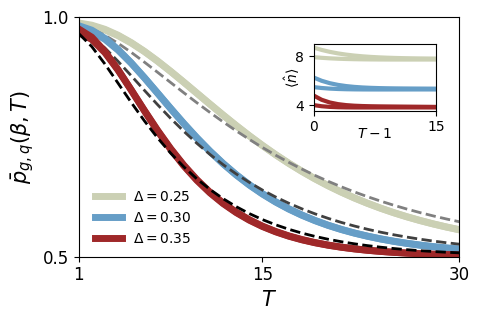

In [ ]:
R0, R1 = 120,30
steps = 25
q0_range = (l/2)*np.linspace(0,1.0,steps)
p0_range = (l/8)*np.arange(0,9,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, ax = plt.subplots(figsize=(4.9,3.3))
inset_ax = fig.add_axes([0.65, 0.65, 0.25, 0.2])  # [left, bottom, width, height]
Delta_range = [.25,0.3,.35]
for i in range(3):
    Delta = Delta_range[i]
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))
    name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_results+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    data_n = np.load(path_data_results+name_photons,allow_pickle=True)
    j = int(steps/2)
    q0 = q0_range[j]
    markers = {0:'none',2:'none',4:'none'}
    colors = {0:lighten_color(green,.5),1:lighten_color(blue,.65),2:lighten_color(red,1)}
    for k in [0,4]:
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        photons = data_n[j][k]
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax1.plot(R_range,probs_q0_p0_p,color=red,ls='-',lw=6)
        if k==0:
            ax.plot(R_range,probs_q0_p0_q,color=colors[i],ls='-',lw=5,label=r'$\Delta = {0:.2f}$'.format(Delta))
        else:
            ax.plot(R_range,probs_q0_p0_q,color=colors[i],ls='-',lw=5)
        inset_ax.plot(R_range,photons,color=colors[i],ls='-',lw=3)
        ax.set_ylim(.5,1)
        ax.set_xlim(1,R1)
        inset_ax.set_xlim(0,14)
        # inset_ax.set_ylim(5.25,5.75)
    def probability_function(T,b):
        a = 0.4
        return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0*np.exp(-b*Delta**2*T)))/2
    popt, pcov = curve_fit(probability_function, R_range, probs_q0_p0_q)
    print(popt,pcov)
    ax.plot(R_range,probability_function(R_range,*popt),ls='--',lw=2,color=lighten_color('black',.5+.25*i))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']  # or ['STIXGeneral']


ax.tick_params(axis='both', which='major', labelsize=12)
inset_ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_yticks([.5,1])
inset_ax.set_yticks([8,4])
ax.set_xlabel(r'$T$',fontsize=15)
ax.set_ylabel(r'$\bar p_{g,q}(\beta, T)$',fontsize=15)
inset_ax.set_xlabel(r'$T-1$',fontsize=10,labelpad=-5)
inset_ax.set_ylabel(r'$\langle \hat n\rangle$',fontsize=10,labelpad=-5)
inset_ax.set_xticks([0,15])
ax.set_xticks([1,15,30])
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(.33,.33))
plt.tight_layout()
plt.savefig(path_figures+'Paper-fig2.pdf',bbox_inches='tight',dpi=600)
plt.show()


b,c 1.451002426881533 -0.43403119690429653
b,c 1.435835672174344 -0.43960669463564417
b,c 1.4265017353978573 -0.43931305436276064


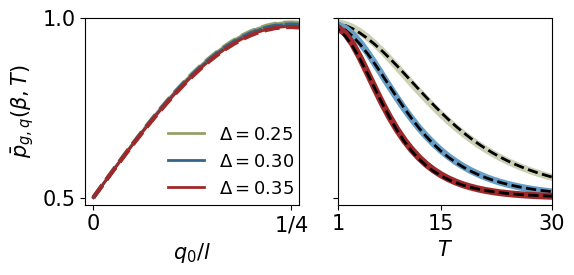

In [10]:
# plotting both the probabilities of the single round as function of q0, and the probabilites of several rounds with improved function
# improving the fit
R0, R1 = 120,30
steps = 32
q0_range = (l/steps)*np.arange(0,steps+1,1)
p0_range = (l/steps)*np.arange(0,steps+1,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, axs = plt.subplots(1,2,figsize=(6,3),sharey=True)
ax1, ax2 = axs
Delta_range = [.25,0.3,.35]
colors = [lighten_color(green,.5),lighten_color(blue,.65),lighten_color(red,1)]
for i in range(3):
    Delta = Delta_range[i]
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_results+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    j = int(steps/4)
    q0 = q0_range[j]
    markers = {0:'none',1:'o',2:'P'}
    labels = {0:r'$p_0=0$',1:r'$p_0=l/8$',2:r'$q_0=p_0=l/4$'}

    for k in [2]:#you can try any other value of p_0, up to l/4 the fits remain nearly the same
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        cd = np.cosh(Delta**2)
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax1.plot(R_range,probs_q0_p0_p,color=lighten_color(red,1-.07*k),ls='-',lw=6)
        ax2.plot(R_range,1-probs_q0_p0_q,color=colors[i],ls='-',lw=5,marker='None',markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5)

        def update_function(params): #this would be actual function written in the main, it also works, it was just harder to write a fit code as curve_fit doesn't take it.
            a = 0.4
            b, c = params
            q_list = [q0]
            p_list = [(1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2]
            for T in np.arange(1,R1+1,1):
                qt = q_list[T-1].copy()
                rate2 = b+c*np.abs(np.sin(l*qt))
                qt = q0*np.exp(-rate2*Delta**2*T)
                q_list.append(qt)
                pgt = (1+np.exp(-a*Delta**2)*np.sin(l*cd*qt))/2
                p_list.append(pgt)
            return np.linalg.norm(np.array(p_list)-(1-np.array(probs_q0_p0_q)))

        from scipy.optimize import minimize
        initial_guess = [1.42,-.55]
        result = minimize(update_function, initial_guess, method='Nelder-Mead', tol=1e-6)
        b,c = result.x
        print('b,c',b,c)
        b, c = 1.44,-.44
        
        def improved_fit(params): #this would be actual function written in the main, it also works, it was just harder to write a fit code as curve_fit doesn't take it.
            a = 0.4
            b, c = params
            q_list = [q0]
            p_list = [(1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2]
            for T in np.arange(1,R1+1,1):
                qt = q_list[T-1].copy()
                rate2 = b+c*np.abs(np.sin(l*qt))
                qt = q0*np.exp(-rate2*Delta**2*T)
                q_list.append(qt)
                pgt = (1+np.exp(-a*Delta**2)*np.sin(l*cd*qt))/2
                p_list.append(pgt)
            return np.array(p_list)
        ax2.plot(R_range,improved_fit([b,c]),ls='--',lw=2,color='black')

        # ax1.set_ylim(0.5,1)
        ax2.set_xlim(1,R1)

#appendix plot
name = 'probabilities_q_single_subround_q0_range(0,lhalf,48)_delta(25,30,35).npy'
probs_q = np.load(path_data_results+name)
a = 0.4
Delta_range = [.25,.3,.35]
steps = 48
q0_range = (l/2/steps)*np.arange(0,steps+1,1)
colors = [green,blue,red]
for i in range(len(Delta_range)):
    Delta = Delta_range[i]
    cd = np.cosh(Delta**2)
    def probability_function(q0,a):
        return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2
    ax1.plot(q0_range/l,probability_function(q0_range,a),'-',label=r'$\Delta={0:.2f}$'.format(Delta),lw=2,color=colors[i])

plt.rcParams.update({'font.size': 15})
ax1.plot(q0_range/l,1-probs_q[0],ls='--',lw=3,color=colors[0],alpha=1)
ax1.plot(q0_range/l,1-probs_q[1],ls='--',lw=3,color=colors[1],alpha=1)
ax1.plot(q0_range/l,1-probs_q[-1],ls='--',lw=3,color=colors[2],alpha=1)

plt.subplots_adjust(wspace=0.2)  # Adjust the value as needed

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_yticks([.5,1])
ax1.set_xticks([0,.25])
ax2.set_xticks([1,15,30])
ax1.legend(loc='lower right',frameon=False,fontsize=13,bbox_to_anchor=(1.05,-.05))
# ax2.legend(loc='upper right')
ax1.set_xticklabels([r'$0$',r'$1/4$'])
ax1.set_xlim(-.01,.26)
ax1.set_ylim(.48,1.0)
ax1.set_xlabel(r'$q_0/l$',fontsize=15)
ax1.set_ylabel(r'$\bar p_{g,q}(\beta,T)$',fontsize=15)
ax2.set_xlabel(r'$T$',fontsize=15)
plt.tight_layout()
# plt.savefig(path_figures+'appendix-sBs-p(q0)-p(T).pdf',dpi=600)
plt.show()